In [ ]:
! pip install transformers
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 17.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=a8908fb41470469fc18144ac03882a6021a186a655f71e5c11fb6bdaa8ff10b1
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 25.6 MB/s eta 0:00:00


In [ ]:

import sentence_transformers 
import datasets

snli = datasets.load_dataset('snli', split='train')
mnli = datasets.load_dataset('glue', 'mnli', split='train')
mnli= mnli.remove_columns('idx')
snli = snli.cast(mnli.features)

dataset = datasets.concatenate_datasets([snli, mnli])

del snli, mnli

Downloading:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Dataset snli downloaded and prepared to /root/.cache/huggingface/datasets/snli/plain_text/1.0.0/1f60b67533b65ae0275561ff7828aad5ee4282d0e6f844fd148d05d3c6ea251b. Subsequent calls will reuse this data.


Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Generating test_matched split:   0%|          | 0/9796 [00:00<?, ? examples/s]

Generating test_mismatched split:   0%|          | 0/9847 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/mnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Casting the dataset:   0%|          | 0/550152 [00:00<?, ? examples/s]

In [ ]:
print(f"before: {len(dataset)} rows")
dataset = dataset.filter(
    lambda x: True if x['label'] == 0 else False
)
print(f"after: {len(dataset)} rows")

before: 942854 rows


Filter:   0%|          | 0/942854 [00:00<?, ? examples/s]

after: 314315 rows


In [ ]:
from sentence_transformers import InputExample
from tqdm.auto import tqdm  # so we see progress bar

train_samples = []
for row in tqdm(dataset):
    train_samples.append(InputExample(
        texts=[row['premise'], row['hypothesis']]))

  0%|          | 0/314315 [00:00<?, ?it/s]

In [ ]:
from sentence_transformers import datasets

batch_size = 8

loader = datasets.NoDuplicatesDataLoader(
    train_samples, batch_size=batch_size)

In [ ]:
from sentence_transformers import models, SentenceTransformer

bert = models.Transformer('bert-base-uncased')
pooler = models.Pooling(
    bert.get_word_embedding_dimension(),
    pooling_mode_mean_tokens=True
)

model = SentenceTransformer(modules=[bert, pooler])

model

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [ ]:
from sentence_transformers import losses

loss = losses.MultipleNegativesRankingLoss(model)

In [ ]:
epochs = 1
warmup_steps = int(len(loader) * epochs * 0.1)

model.fit(
    train_objectives=[(loader, loss)],
    epochs=epochs,
    warmup_steps=warmup_steps,
    output_path='./sbert_test_mnr2',
    show_progress_bar=True
) 

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/39289 [00:00<?, ?it/s]

In [ ]:
##training 2
import pandas as pd
df=pd.read_excel("train.xlsx")
df['text']=df['text'].replace(r'[^a-zA-Z\s]','',regex=True)
train_samples = []
for row in tqdm(range(len(df))):
    train_samples.append(InputExample(
        texts=[df.loc[row,'text'], df.loc[row,'reason']]))
batch_size = 8

loader = datasets.NoDuplicatesDataLoader(
    train_samples, batch_size=batch_size)

  0%|          | 0/2061 [00:00<?, ?it/s]

In [ ]:
bert = models.Transformer('bert-base-uncased')
pooler = models.Pooling(
    bert.get_word_embedding_dimension(),
    pooling_mode_mean_tokens=True
)

model = SentenceTransformer(modules=[bert, pooler])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
loss = losses.MultipleNegativesRankingLoss(model)

In [ ]:
epochs = 1
warmup_steps = int(len(loader) * epochs * 0.1)

model.fit(
    train_objectives=[(loader, loss)],
    epochs=epochs,
    warmup_steps=warmup_steps,
    output_path='./sbert_test_customdataset',
    show_progress_bar=True)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/257 [00:00<?, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
# model.save('/content/drive/MyDrive/','mymodel')

Mounted at /content/drive/


In [ ]:
import pandas as pd
sts=pd.read_excel('evaluation.xlsx')
sts

FileNotFoundError: ignored

In [ ]:
from sentence_transformers import InputExample

samples = []
for i in range(len(sts)):
    samples.append(InputExample(
        texts=[sts.loc[i,'text'], sts.loc[i,'reason']],
        label=sts.loc[i,'label']
    ))

In [ ]:
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator

evaluator = EmbeddingSimilarityEvaluator.from_input_examples(
    samples, write_csv=True
)

In [ ]:
evaluator(model)

0.4976749026635254

In [ ]:
test_df=pd.read_excel("evaluation.xlsx")
text1=list(test_df['text'])
text2=list(test_df['reason'])
text1_en=model.encode(text1)
text2_en=model.encode(text2)
test_labl=list(test_df['label'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
for i in range(test_df.shape[0]):
  test_df.loc[i,'output']=cosine_similarity([text1_en[i]],[text2_en[i]])[0][0]

# test_df.to_excel('/content/drive/MyDrive/output_model3_customdataset.xlsx')

In [ ]:
###results for (given/custom dataset) trained model
import pandas as pd
import numpy as np
# test_df=pd.read_excel('output_model3_customdataset.xlsx')
test_df['classification_0.65']=np.where(test_df['output']>0.55,  1,0)
test_df['classification_0.7']=np.where(test_df['output']>0.7,  1,0)
test_df

,text,reason,label,output,classification_0.65,classification_0.7
0,the app is crashing when i play a vedio,app crashes during playback,1,0.621219,1,0
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0,0.625155,1,0
2,very helpful when and home working remotley,good app for work,0,0.541903,0,0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0,0.737130,1,1
4,one of my favorite apps,good for spending time,0,0.403640,0,0
...,...,...,...,...,...,...
8995,very good streaming platform has a lot of content,app has very good content,1,0.756376,1,1
8996,so paying for an app that is not fit for purpose.,unable to use app,0,0.525602,0,0
8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0,0.492125,0,0
8998,i can not watch the new disney shows.,unable to load the episodes list,0,0.296076,0,0


Accuracy: 0.7
Precision: 0.5422396856581533
Recall 0.643785404865045
F1 0.5886654478976234


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

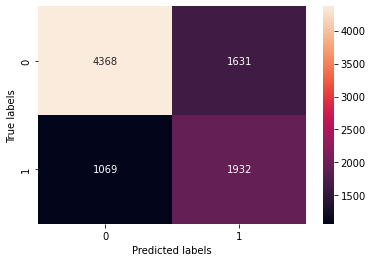

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
print('Accuracy:', accuracy_score(test_df['label'],test_df['classification_0.65']))
print('Precision:',  precision_score(test_df['label'],test_df['classification_0.65']))
print('Recall', recall_score(test_df['label'],test_df['classification_0.65']))
print('F1', f1_score(test_df['label'],test_df['classification_0.65']))
cm=confusion_matrix(test_df['label'],test_df['classification_0.65'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])


Accuracy: 0.7253333333333334
Precision: 0.7286084701815039
Recall 0.2809063645451516
F1 0.4054834054834054


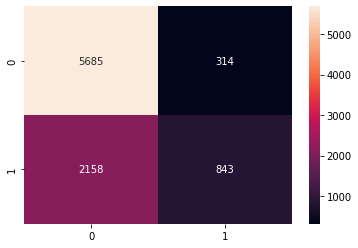

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
print('Accuracy:', accuracy_score(test_df['label'],test_df['classification_0.7']))
print('Precision:',  precision_score(test_df['label'],test_df['classification_0.7']))
print('Recall', recall_score(test_df['label'],test_df['classification_0.7']))
print('F1', f1_score(test_df['label'],test_df['classification_0.7']))
cm=confusion_matrix(test_df['label'],test_df['classification_0.7'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks

ax.xaxis.set_ticklabels([0,1]);
ax.yaxis.set_ticklabels([0,1]);


In [ ]:
import numpy as np
test_df['classification_0.65']=np.where(test_df['output']>0.65,  1,0)
test_df['classification_0.7']=np.where(test_df['output']>0.7,  1,0)

test_df

,Unnamed: 0,text,reason,label,output,classification_0.65,classification_0.7
0,0,the app is crashing when i play a vedio,app crashes during playback,1,0.731435,1,1
1,1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0,0.685104,1,0
2,2,very helpful when and home working remotley,good app for work,0,0.550744,0,0
3,3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0,0.776567,1,1
4,4,one of my favorite apps,good for spending time,0,0.313317,0,0
...,...,...,...,...,...,...,...
8995,8995,very good streaming platform has a lot of content,app has very good content,1,0.725912,1,1
8996,8996,so paying for an app that is not fit for purpose.,unable to use app,0,0.774245,1,1
8997,8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0,0.313850,0,0
8998,8998,i can not watch the new disney shows.,unable to load the episodes list,0,0.349530,0,0


In [ ]:
test_df.to_excel('/content/drive/MyDrive/output_model3.xlsx')

In [ ]:
test_df=pd.read_excel('output_model3.xlsx')

Accuracy: 0.7465555555555555
Precision: 0.64446227929374
Recall 0.5351549483505498
F1 0.584744219916257


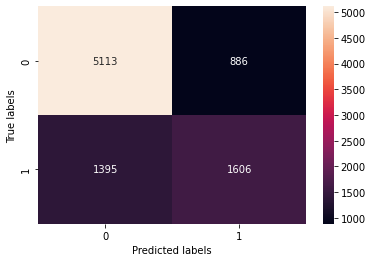

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
print('Accuracy:', accuracy_score(test_df['label'],test_df['classification_0.65']))
print('Precision:',  precision_score(test_df['label'],test_df['classification_0.65']))
print('Recall', recall_score(test_df['label'],test_df['classification_0.65']))
print('F1', f1_score(test_df['label'],test_df['classification_0.65']))
cm=confusion_matrix(test_df['label'],test_df['classification_0.65'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels([0,1]);
ax.yaxis.set_ticklabels([0,1]);


Accuracy: 0.7481111111111111
Precision: 0.7229647630619684
Recall 0.39653448850383205
F1 0.5121583817516678


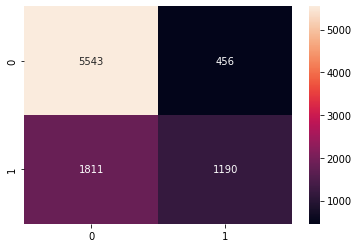

In [ ]:
print('Accuracy:', accuracy_score(test_df['label'],test_df['classification_0.7']))
print('Precision:',  precision_score(test_df['label'],test_df['classification_0.7']))
print('Recall', recall_score(test_df['label'],test_df['classification_0.7']))
print('F1', f1_score(test_df['label'],test_df['classification_0.7']))

cm=confusion_matrix(test_df['label'],test_df['classification_0.7'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks

ax.xaxis.set_ticklabels([0,1]);
ax.yaxis.set_ticklabels([0,1]);

In [ ]:
test_df.to_excel('Output_model3.xlsx')